In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

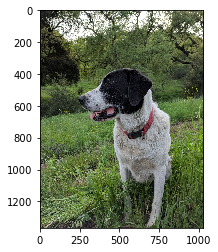

In [5]:
full_dog = cv2.imread('DATA/sammy.jpg')
full_img = cv2.cvtColor(full_dog,cv2.COLOR_BGR2RGB)
plt.imshow(full_img)

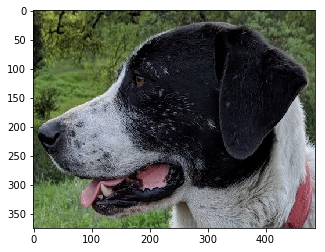

In [6]:
dog_face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(dog_face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [7]:
# methods used in template matching
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

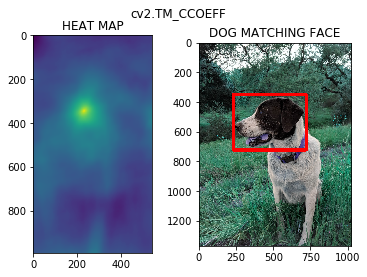

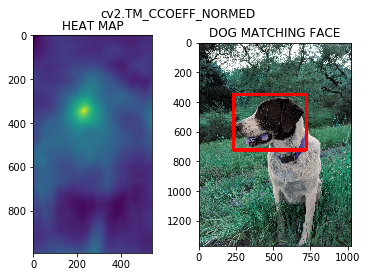

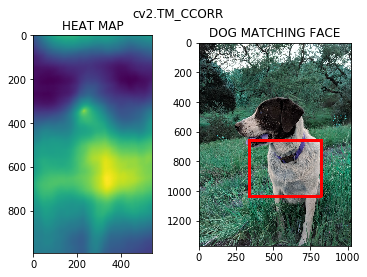

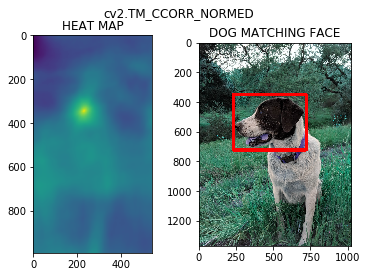

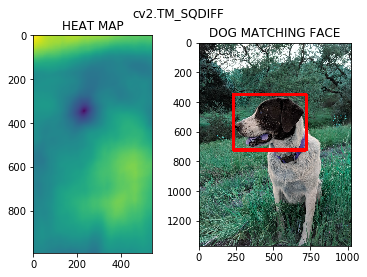

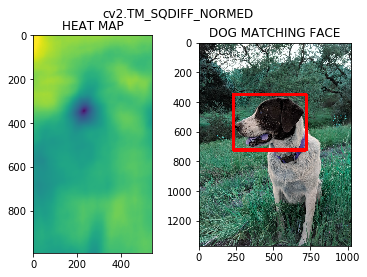

In [13]:
# as methods are in type string we shall use eval function to match for the same named function
for m in methods:
    dog_copy = full_dog.copy()
    method = eval(m)
    result = cv2.matchTemplate(dog_copy,dog_face,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)
    if m in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channel = dog_face.shape
    bottom_right = (top_left[0] + width,top_left[1] + height)
    cv2.rectangle(dog_copy,top_left,bottom_right,(255,0,0),20)
    
    # plotting
    
    plt.subplot(121) # one row by 2 columns and 1 column
    plt.title('HEAT MAP')
    plt.imshow(result)
    
    plt.subplot(122) # one row by 2 columns and 2 column
    plt.title('DOG MATCHING FACE')
    plt.imshow(dog_copy)
    
    plt.suptitle(m)
    plt.show()